In [7]:
import os
os.getcwd()
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Assignment 2 Part 1

In [6]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import datasets
%matplotlib inline

# 1.1

In [9]:
trainDat = pd.read_csv('train.csv')
testDat =  pd.read_csv('test.csv')

In [10]:
trainDat.shape
testDat.shape

(1460, 81)

(1459, 80)

In [11]:
trainDat.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

The EDA and data cleaning are being continued here for all the features. 

In [13]:
train_id = trainDat['Id']
test_id = testDat['Id']
del trainDat['Id']
del testDat['Id']

The "Id" column was deleted from the dataframes because they serve no use in the regression models.

In [14]:
trainDat.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

Here we get a list of all the missing values in the train dataframe.

In [15]:
trainDat['PoolQC'] = trainDat['PoolQC'].fillna('None')
trainDat['MiscFeature'] = trainDat['MiscFeature'].fillna('None')
trainDat['Alley'] = trainDat['Alley'].fillna('None')
trainDat['Fence'] = trainDat['Fence'].fillna('None')
trainDat['FireplaceQu'] = trainDat['FireplaceQu'].fillna('None')
testDat['PoolQC'] = testDat['PoolQC'].fillna('None')
testDat['MiscFeature'] = testDat['MiscFeature'].fillna('None')
testDat['Alley'] = testDat['Alley'].fillna('None')
testDat['Fence'] = testDat['Fence'].fillna('None')
testDat['FireplaceQu'] = testDat['FireplaceQu'].fillna('None')

The data description say that houses that have NaN for all these features means that none exist for those houses so we replaced the NaN values with 'None'.

In [16]:
trainDat['LotFrontage'].fillna(trainDat['LotFrontage'].mean(), inplace=True)
testDat['LotFrontage'].fillna(trainDat['LotFrontage'].mean(), inplace=True)

The missing values for 'LotFrontage' were imputed with the mean for that feature. 

In [17]:
garage_cols = [col for col in trainDat if col.startswith('Garage')]
# For the numerical features:
for i in trainDat[garage_cols].select_dtypes(exclude='object').columns:
    trainDat[i] = trainDat[i].fillna(0)

# For the categorical features:
for i in trainDat[garage_cols].select_dtypes(include='object').columns:
    trainDat[i] = trainDat[i].fillna('None')
    
garage_cols = [col for col in testDat if col.startswith('Garage')]
# For the numerical features:
for i in testDat[garage_cols].select_dtypes(exclude='object').columns:
    testDat[i] = testDat[i].fillna(0)

# For the categorical features:
for i in testDat[garage_cols].select_dtypes(include='object').columns:
    testDat[i] = testDat[i].fillna('None')

The missing values were imputed for features that contain 'Garage' in their name. The value 0 replaced NaN for the numerical features and "None" replaced NaN for the categorical features. 

In [18]:
bsmt_cols = [col for col in trainDat if col.startswith('Bsmt')]

# For the numerical features:
for i in trainDat[bsmt_cols].select_dtypes(exclude='object').columns:
    trainDat[i] = trainDat[i].fillna(0)

# For the categorical features:
for i in trainDat[bsmt_cols].select_dtypes(include='object').columns:
    trainDat[i] = trainDat[i].fillna('None')

bsmt_cols = [col for col in testDat if col.startswith('Bsmt')]

# For the numerical features:
for i in testDat[bsmt_cols].select_dtypes(exclude='object').columns:
    testDat[i] = testDat[i].fillna(0)

# For the categorical features:
for i in testDat[bsmt_cols].select_dtypes(include='object').columns:
    testDat[i] = testDat[i].fillna('None')

The missing values were imputed for features that contain 'Bsmt' in their name. The value 0 replaced NaN for the numerical features and "None" replaced NaN for the categorical features.

In [19]:
mas_cols = [col for col in trainDat if col.startswith('Mas')]

# For the numerical features:
for i in trainDat[mas_cols].select_dtypes(exclude='object').columns:
    trainDat[i] = trainDat[i].fillna(0)

# For the categorical features:
for i in trainDat[mas_cols].select_dtypes(include='object').columns:
    trainDat[i] = trainDat[i].fillna('None')

mas_cols = [col for col in testDat if col.startswith('Mas')]

# For the numerical features:
for i in testDat[mas_cols].select_dtypes(exclude='object').columns:
    testDat[i] = testDat[i].fillna(0)

# For the categorical features:
for i in testDat[mas_cols].select_dtypes(include='object').columns:
    testDat[i] = testDat[i].fillna('None')

The missing values were imputed for features that contain 'Mas' in their name. The value 0 replaced NaN for the numerical features and "None" replaced NaN for the categorical features.

In [20]:
trainDat.isnull().sum().sort_values(ascending=False).head(10)

Electrical      1
MSZoning        0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
dtype: int64

In [21]:
trainDat = trainDat.fillna(trainDat.mode().iloc[0])
testDat = testDat.fillna(trainDat.mode().iloc[0])

The rest of the missing NaN values were transformed to the mode of the column. 

# 1.2

In [22]:
testDat2 = trainDat.sample(n=100,random_state=7)
trainDat2 = trainDat[~(trainDat.index).isin(testDat2.index)]
any(trainDat2.index.isin(testDat2.index))

False

100 random data records was set aside as the final test data set. The training data was also set up to ensure that the index matched the test data and the data didn't overlap.

In [23]:
np.random.seed(9)
newseq=np.random.permutation(len(trainDat2))
trainDatr=trainDat2.iloc[newseq,:]

The training data was randomly shuffled here. 

In [24]:
kf=KFold(n_splits=10)
print(f'Number of data folds: {kf.get_n_splits()}')

Number of data folds: 10


10 fold cross validation is being prepared here to accurately train and test our data.

In [25]:
alphas=[0.001,0.01,0.1,1.0,10.0]   # The sklearn default is 1.0
type(alphas)

list

The alpha values that will be tested are put together in a list here.

In [26]:
trainDatr.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [27]:
ct = ColumnTransformer([('standardized',preprocessing.StandardScaler(),
                         [0,2,3,16,17,18,19,25,33,35,36,37,42,43,44,45,46,47,48,
                          49,50,51,53,55,58,60,61,65,66,67,68,69,70,74,75,76]),
    ('oneHotter', preprocessing.OneHotEncoder(handle_unknown='ignore'),
     [1,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,26,27,28,29,30,31,32,34,
      38,39,40,41,52,54,56,57,59,62,63,64,71,72,73,77,])])
ct

ColumnTransformer(transformers=[('standardized', StandardScaler(),
                                 [0, 2, 3, 16, 17, 18, 19, 25, 33, 35, 36, 37,
                                  42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53,
                                  55, 58, 60, 61, 65, 66, 67, ...]),
                                ('oneHotter',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 [1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                  20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31,
                                  32, 34, 38, 39, 40, 41, ...])])

ColumnTransformer was used to standardize(mean=0,sd=1) the numerical values and to oneHot encode the categorial values.

In [28]:
y=trainDatr.SalePrice.to_numpy(copy=True)
X=trainDatr.loc[:,trainDatr.columns!='SalePrice'].to_numpy(copy=True)
X.shape   
y.shape

(1360, 79)

(1360,)

np arrays were created for training and the target variable, 'SalePrice', is established.

In [29]:
resListofDicts=[]                        # a list of results in dicts
for alphVal in alphas:  # Outer processing loop
    fold = 0            # fold counter
    for trainNdx, testNdx in kf.split(X): # cv loop. should do it 10 times.
        fold+=1
        Xtr = ct.fit_transform(X[trainNdx])   # fit and transform X training 
        Xval = ct.transform(X[testNdx])       # transform X test fold
        regMod=Ridge(alpha=alphVal)  # instantiate regressor
        fitMod=regMod.fit(Xtr,y[trainNdx])           # fitted
        predtr = fitMod.predict(Xtr)             # training pred values
        predval = fitMod.predict(Xval)           # test pred values
        msetr = metrics.mean_squared_error(y[trainNdx],predtr)
        mseval = metrics.mean_squared_error(y[testNdx],predval)
        resDict={'alpha': alphVal,'fold': fold,
                'trainMSE':msetr,'testMSE':mseval}
        resListofDicts.append(resDict)

The Ridge regression is run here for the 10 fold cross validation and the results are assembled into a list of dictionaries. 

In [30]:
resultsDF=pd.DataFrame(resListofDicts)
resultsDF.shape
resultsDF.columns
resultsSummaryDF=resultsDF.groupby(['alpha'],as_index=False).agg(
                {'trainMSE':['mean','std'],'testMSE':['mean','std']})
resultsSummaryDF

(50, 4)

Index(['alpha', 'fold', 'trainMSE', 'testMSE'], dtype='object')

alpha      trainMSE                     testMSE              
                   mean           std          mean           std
0   0.001  3.663671e+08  1.576119e+07  1.300527e+09  1.515524e+09
1   0.010  3.671285e+08  1.647525e+07  1.293137e+09  1.511595e+09
2   0.100  3.753139e+08  1.807724e+07  1.247803e+09  1.456417e+09
3   1.000  4.592717e+08  3.884862e+07  1.169771e+09  1.233969e+09
4  10.000  6.117212e+08  6.031270e+07  1.116225e+09  1.118892e+09

A pandas dataframe was created using the list of dictionaries and they were aggregated to summarize the results.

In [31]:
resultsSummaryDF.columns=resultsSummaryDF.columns.droplevel(0)
resultsSummaryDF.columns=['alpha','train_mean_MSE','train_std_MSE',
                          'test_mean_MSE','test_std_MSE']
resultsSummaryDF.sort_values(by='test_mean_MSE',ascending=True)

,alpha,train_mean_MSE,train_std_MSE,test_mean_MSE,test_std_MSE
4,10.000,6.117212e+08,6.031270e+07,1.116225e+09,1.118892e+09
3,1.000,4.592717e+08,3.884862e+07,1.169771e+09,1.233969e+09
2,0.100,3.753139e+08,1.807724e+07,1.247803e+09,1.456417e+09
1,0.010,3.671285e+08,1.647525e+07,1.293137e+09,1.511595e+09
0,0.001,3.663671e+08,1.576119e+07,1.300527e+09,1.515524e+09


The dataframe was cleaned up and organized from lowest test mean MSE to highest test mean MSE.

In [32]:
resListofDicts=[]                        # a list of results in dicts
for alphVal in alphas:  # Outer processing loop
    fold = 0            # fold counter
    for trainNdx, testNdx in kf.split(X): # cv loop. should do it 10 times.
        fold+=1
        Xtr = ct.fit_transform(X[trainNdx])   # fit and transform X training 
        Xval = ct.transform(X[testNdx])       # transform X test fold
        regMod=Lasso(alpha=alphVal, max_iter = 100000, normalize = True, 
                     tol = .01)  # instantiate regressor
        fitMod=regMod.fit(Xtr,y[trainNdx])           # fitted
        predtr = fitMod.predict(Xtr)             # training pred values
        predval = fitMod.predict(Xval)           # test pred values
        msetr = metrics.mean_squared_error(y[trainNdx],predtr)
        mseval = metrics.mean_squared_error(y[testNdx],predval)
        resDict={'alpha': alphVal,'fold': fold,
                'trainMSE':msetr,'testMSE':mseval}
        resListofDicts.append(resDict)

In [33]:
resultsDF=pd.DataFrame(resListofDicts)
resultsDF.shape
resultsDF.columns
resultsSummaryDF=resultsDF.groupby(['alpha'],as_index=False).agg(
                {'trainMSE':['mean','std'],'testMSE':['mean','std']})
resultsSummaryDF

(50, 4)

Index(['alpha', 'fold', 'trainMSE', 'testMSE'], dtype='object')

alpha      trainMSE                     testMSE              
                   mean           std          mean           std
0   0.001  3.490038e+08  1.683691e+07  1.351794e+10  3.684848e+10
1   0.010  3.490114e+08  1.683636e+07  1.283684e+10  3.487727e+10
2   0.100  3.496113e+08  1.679309e+07  8.102683e+09  2.147975e+10
3   1.000  3.643354e+08  1.639162e+07  1.120802e+09  1.324540e+09
4  10.000  4.017999e+08  1.777868e+07  1.069946e+09  1.299917e+09

In [34]:
resultsSummaryDF.columns=resultsSummaryDF.columns.droplevel(0)
resultsSummaryDF.columns=['alpha','train_mean_MSE','train_std_MSE',
                          'test_mean_MSE','test_std_MSE']
resultsSummaryDF.sort_values(by='test_mean_MSE',ascending=True)

,alpha,train_mean_MSE,train_std_MSE,test_mean_MSE,test_std_MSE
4,10.000,4.017999e+08,1.777868e+07,1.069946e+09,1.299917e+09
3,1.000,3.643354e+08,1.639162e+07,1.120802e+09,1.324540e+09
2,0.100,3.496113e+08,1.679309e+07,8.102683e+09,2.147975e+10
1,0.010,3.490114e+08,1.683636e+07,1.283684e+10,3.487727e+10
0,0.001,3.490038e+08,1.683691e+07,1.351794e+10,3.684848e+10


The same cleaning and organization was applied to the dataframe for Lasso regression.

In [35]:
alphas=[0.0001,0.001,0.01,0.1,1]
resListofDicts=[]                        # a list of results in dicts
for alphVal in alphas:  # Outer processing loop
    fold = 0            # fold counter
    for trainNdx, testNdx in kf.split(X): # cv loop. should do it 10 times.
        fold+=1
        Xtr = ct.fit_transform(X[trainNdx])   # fit and transform X training 
        Xval = ct.transform(X[testNdx])       # transform X test fold
        regMod=ElasticNet(alpha=alphVal, max_iter = 100000, normalize = True, 
                          tol = .001)  # instantiate regressor
        fitMod=regMod.fit(Xtr,y[trainNdx])           # fitted
        predtr = fitMod.predict(Xtr)             # training pred values
        predval = fitMod.predict(Xval)           # test pred values
        msetr = metrics.mean_squared_error(y[trainNdx],predtr)
        mseval = metrics.mean_squared_error(y[testNdx],predval)
        resDict={'alpha': alphVal,'fold': fold,
                'trainMSE':msetr,'testMSE':mseval}
        resListofDicts.append(resDict)

In [36]:
resultsDF=pd.DataFrame(resListofDicts)
resultsDF.shape
resultsDF.columns
resultsSummaryDF=resultsDF.groupby(['alpha'],as_index=False).agg(
                {'trainMSE':['mean','std'],'testMSE':['mean','std']})
resultsSummaryDF

(50, 4)

Index(['alpha', 'fold', 'trainMSE', 'testMSE'], dtype='object')

alpha      trainMSE                     testMSE              
                   mean           std          mean           std
0  0.0001  3.816373e+08  1.885937e+07  1.176966e+09  1.387094e+09
1  0.0010  5.584319e+08  3.824281e+07  1.067660e+09  1.024728e+09
2  0.0100  1.512419e+09  7.790061e+07  1.665054e+09  8.913477e+08
3  0.1000  4.413065e+09  1.294297e+08  4.449110e+09  1.290519e+09
4  1.0000  6.006005e+09  1.625088e+08  6.017258e+09  1.487240e+09

In [37]:
resultsSummaryDF.columns=resultsSummaryDF.columns.droplevel(0)
resultsSummaryDF.columns=['alpha','train_mean_MSE','train_std_MSE',
                          'test_mean_MSE','test_std_MSE']
resultsSummaryDF.sort_values(by='test_mean_MSE',ascending=True)

,alpha,train_mean_MSE,train_std_MSE,test_mean_MSE,test_std_MSE
1,0.0010,5.584319e+08,3.824281e+07,1.067660e+09,1.024728e+09
0,0.0001,3.816373e+08,1.885937e+07,1.176966e+09,1.387094e+09
2,0.0100,1.512419e+09,7.790061e+07,1.665054e+09,8.913477e+08
3,0.1000,4.413065e+09,1.294297e+08,4.449110e+09,1.290519e+09
4,1.0000,6.006005e+09,1.625088e+08,6.017258e+09,1.487240e+09


The same cleaning and organization was applied to the dataframe for ElasticNet regression.

Based on the results of the three regularized regression models, the ElasticNet regression model appeared to perform the best. It had the lowest average MSE at alpha=0.001 for the test data folds and the training data metrics was the closest of the three models to the test data metrics. 

# 1.3

In [38]:
Xtrans=ct.fit_transform(X)
Xtrans.shape

(1360, 294)

In [39]:
regMod=ElasticNet(alpha=.001, max_iter = 100000, normalize = True, tol = .001)
fitMod=regMod.fit(Xtrans,y)
predy=fitMod.predict(Xtrans)

Based on the simple grid search that was performed, alpha = .001 was chosen as the best value for the regularization hyperparameter since it had the lowest average MSE for the test data folds. The low alpha value indicates that more weight is given to the L2 penalty. The model is being refitted using alpha=.001.

In [40]:
R2=fitMod.score(Xtrans,y)
print(f'R2, all training data: {R2.round(3)}')

R2, all training data: 0.906


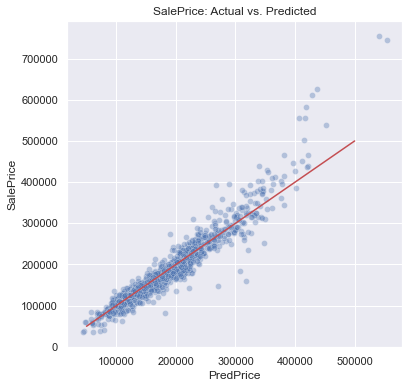

In [41]:
predDF=pd.DataFrame({'SalePrice':y,'PredPrice': predy})

sns.set(rc={"figure.figsize":(6, 6)}) #width=3, #height=4

x_plot=np.linspace(50000,500000,100)
y_plot=x_plot

scatter=sns.scatterplot(data=predDF,x='PredPrice',y='SalePrice',
                alpha=0.35).set(title="SalePrice: Actual vs. Predicted")
plt.plot(x_plot,y_plot,c='r')
plt.show();

The high R2 value and the scatterplot of actual vs predicted prices indicate that the ElasticNet model with alpha = 0.001 is fairly accurate.

In [42]:
X2=testDat2.loc[:,testDat2.columns!='SalePrice'].to_numpy(copy=True)
y2=testDat2.SalePrice.to_numpy(copy=True)
Xtr = ct.fit_transform(X)   # fit and transform X training 
Xval = ct.transform(X2)       # transform X test 
regMod=ElasticNet(alpha=.001, max_iter = 100000, normalize = True, tol = .001)  # instantiate regressor
fitMod=regMod.fit(Xtr,y)           # fitted
predtr = fitMod.predict(Xtr)             # training pred values
predval = fitMod.predict(Xval)           # test pred values
msetr = metrics.mean_squared_error(y,predtr)
mseval = metrics.mean_squared_error(y2,predval)
print(f'training MSE: {round(msetr,2)}')
print(f'test MSE: {round(mseval,2)}') 

training MSE: 588247673.27
test MSE: 1245011161.47


The final model was tested here with the n=100 test cases that were set aside earlier.

# 1.4

In [43]:
Xtrans=ct.fit_transform(X)
Xval = ct.transform(testDat)
regMod=ElasticNet(alpha=.001, max_iter = 100000, normalize = True, tol = .001)  # instantiate regressor
fitMod=regMod.fit(Xtrans,y) 
testDat_Pred=fitMod.predict(Xval)
testDat_Pred

array([111137.7588567 , 160029.51814847, 187175.7581709 , ...,
       176203.6976292 , 116202.43042887, 222613.75327661])

In [44]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = testDat_Pred
submission
submission.to_csv('submission2.csv',index=False)

,Id,SalePrice
0,1461,111137.758857
1,1462,160029.518148
2,1463,187175.758171
3,1464,203075.416759
4,1465,198490.570581
...,...,...
1454,2915,78518.904535
1455,2916,89785.638932
1456,2917,176203.697629
1457,2918,116202.430429


# Assignment 2 Part 2

# 2.1

In [33]:
trainDat = pd.read_csv('titanic_train.csv')
testDat =  pd.read_csv('titanic_test.csv')

In [294]:
trainDat.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [295]:
trainDat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [296]:
del trainDat['Name']
del trainDat['Ticket']
del trainDat['Cabin']
del testDat['Name']
del testDat['Ticket']
del testDat['Cabin']

After looking at the describe,info, and head of the training data, the features 'Name', 'Ticket', and 'Cabin' were all removed from the dataframes because they were either irrelevant to the passenger survival or there were too many missing values. 

In [297]:
train_id = trainDat['PassengerId']
test_id = testDat['PassengerId']
del trainDat['PassengerId']
del testDat['PassengerId']

In [298]:
pd.Series(trainDat['Survived']).value_counts()

0    549
1    342
Name: Survived, dtype: int64

From the value counts obtained in the training data, there were 549 passengers that died and 342 passengers that survived.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

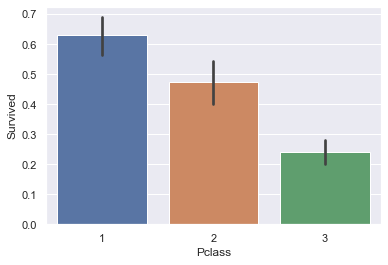

In [299]:
sns.barplot(x=trainDat['Pclass'], y=trainDat['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

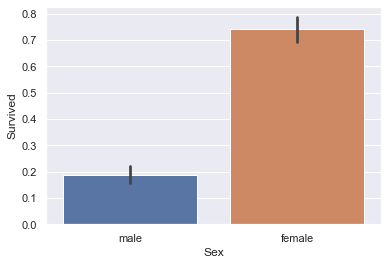

In [300]:
sns.barplot(x=trainDat['Sex'], y=trainDat['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Survived'>

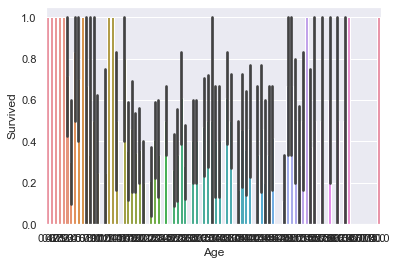

In [301]:
sns.barplot(x=trainDat['Age'], y=trainDat['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

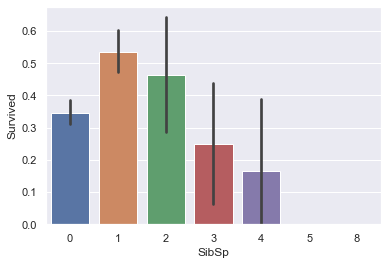

In [302]:
sns.barplot(x=trainDat['SibSp'], y=trainDat['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

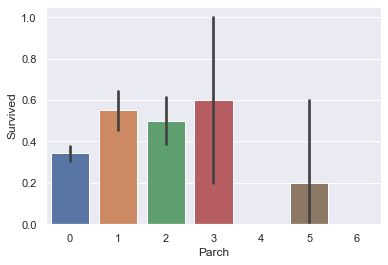

In [303]:
sns.barplot(x=trainDat['Parch'], y=trainDat['Survived'])

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

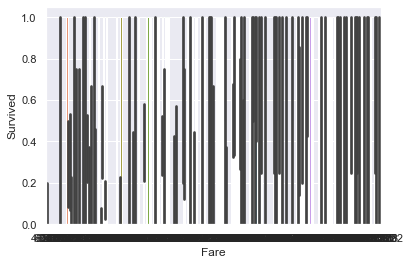

In [304]:
sns.barplot(x=trainDat['Fare'], y=trainDat['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

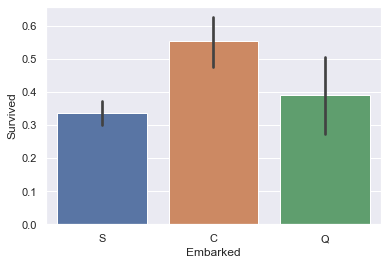

In [305]:
sns.barplot(x=trainDat['Embarked'], y=trainDat['Survived'])

With the barplots shown here we can see the relationship with the features and the survival rate. It appears there's a negative correlation with 'Pclass' and 'Survived. Theres also bit of a relationship with 'Age','SibSp','Sex','Parch', and 'Embarked' with 'Survived'.

In [306]:
trainDat['Age'].fillna(trainDat['Age'].median(), inplace=True)
testDat['Age'].fillna(trainDat['Age'].median(), inplace=True)

The missing values for 'Age' were imputed with the mean for that feature. 

In [307]:
trainDat = trainDat.fillna(trainDat.mode().iloc[0])
testDat = testDat.fillna(trainDat.mode().iloc[0])

The missing values for 'Embarked' were imputed with the mode for that feature.

In [308]:
trainDat=pd.get_dummies(trainDat, columns=["Pclass","Embarked","Sex"])
testDat=pd.get_dummies(testDat, columns=["Pclass","Embarked","Sex"])

# 2.2

In [309]:
X=trainDat.loc[:,trainDat.columns!='Survived'].to_numpy(copy=True)
y=trainDat.Survived.to_numpy(copy=True)
np.random.seed(10)
reIndx=np.arange(len(X))
y = y[reIndx]
X = X[reIndx,:]

Training data was randomly shuffled here

In [310]:
pipe=make_pipeline(StandardScaler(), 
                   LogisticRegression(solver='saga',
                                     penalty='elasticnet',
                                     max_iter=10000))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=10000, penalty='elasticnet',
                                    solver='saga'))])

The pipeline is being set up in this step and the features being standardized, OneHotEncoded, and fitting a logistic regression.

In [311]:
param_grid=dict(
           logisticregression__C=[0.01,0.1,1.0,10.0],
            logisticregression__l1_ratio=[0.0,0.1,0.25,0.50,0.75,0.90,1.0])
type(param_grid)   

dict

The hyperparameters that are going to be explored as defined here.

In [312]:
grid=GridSearchCV(pipe,param_grid=param_grid,n_jobs=-1)
grid

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1.0, 10.0],
                         'logisticregression__l1_ratio': [0.0, 0.1, 0.25, 0.5,
                                                          0.75, 0.9, 1.0]})

The grid search is set up here in this step.

In [313]:
gridFit = grid.fit(X,y)

In [314]:
print(pd.DataFrame(gridFit.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.007890      0.005533         0.000777        0.000052   
1        0.006581      0.000767         0.000615        0.000103   
2        0.006821      0.001586         0.000681        0.000248   
3        0.007249      0.002627         0.000555        0.000038   
4        0.004829      0.000382         0.000671        0.000201   
5        0.005070      0.000405         0.000564        0.000033   
6        0.008373      0.005652         0.000649        0.000178   
7        0.006543      0.001639         0.000767        0.000404   
8        0.010861      0.000410         0.000545        0.000022   
9        0.009889      0.003180         0.000864        0.000667   
10       0.006048      0.000294         0.000645        0.000136   
11       0.006070      0.001555         0.000678        0.000133   
12       0.005769      0.000449         0.000581        0.000015   
13       0.005579      0.000411         0.001075

In [315]:
gridFit.best_params_

{'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.0}

The grid search was ran and the parameters for the model with best accuracy was determined above. The regularization strength parameter was 0.1 which means more weight regularization and the l1_ratio was 0.0 which means only L2 regularization.

In [22]:
pipe=make_pipeline(StandardScaler(), LDA())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [26]:
param_grid = dict()
param_grid['lineardiscriminantanalysis__solver'] = ['svd', 'lsqr']

In [27]:
grid=GridSearchCV(pipe,param_grid,n_jobs=-1)
grid

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lineardiscriminantanalysis',
                                        LinearDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'lineardiscriminantanalysis__solver': ['svd', 'lsqr']})

In [319]:
gridFit = grid.fit(X,y)

In [320]:
print(pd.DataFrame(gridFit.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004566      0.000803         0.001187        0.001330   
1       0.004556      0.000845         0.000646        0.000079   

  param_lineardiscriminantanalysis__solver  \
0                                      svd   
1                                     lsqr   

                                           params  split0_test_score  \
0   {'lineardiscriminantanalysis__solver': 'svd'}           0.793296   
1  {'lineardiscriminantanalysis__solver': 'lsqr'}           0.793296   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.808989           0.780899           0.758427           0.820225   
1           0.808989           0.780899           0.758427           0.820225   

   mean_test_score  std_test_score  rank_test_score  
0         0.792367        0.021618                1  
1         0.792367        0.021618                1  


In [321]:
gridFit.best_params_

{'lineardiscriminantanalysis__solver': 'svd'}

The grid search was ran for LDA and the parameters for the model with best accuracy was determined above. The mean test score was the same for the svd and lsqr solver.

In [8]:
pipe=make_pipeline(StandardScaler(), KNN())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [20]:
n_neighbors = list(range(1,30))
param_grid = dict(kneighborsclassifier__n_neighbors = n_neighbors)

In [21]:
grid=GridSearchCV(pipe,param_grid,n_jobs=-1)
grid

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29]})

In [325]:
gridFit = grid.fit(X,y)

In [326]:
print(pd.DataFrame(gridFit.cv_results_))

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002458      0.000310         0.015045        0.003447   
1        0.002636      0.001003         0.014955        0.007621   
2        0.003155      0.001497         0.011386        0.000832   
3        0.001907      0.000151         0.010583        0.002036   
4        0.002546      0.000540         0.012519        0.001653   
5        0.002876      0.001208         0.012010        0.001550   
6        0.001834      0.000195         0.010993        0.001609   
7        0.001930      0.000165         0.010464        0.001081   
8        0.001966      0.000092         0.010390        0.000492   
9        0.001961      0.000094         0.010777        0.000444   
10       0.002211      0.000364         0.012562        0.004840   
11       0.002373      0.001333         0.011718        0.004201   
12       0.001957      0.000016         0.012003        0.001489   
13       0.001816      0.000276         0.010916

In [327]:
gridFit.best_params_

{'kneighborsclassifier__n_neighbors': 26}

Based on the results of the classifier models, the highest mean test score was calculated using the KNN method with the n_neighbors classifier set to 26. This gave a mean test score of .808104.

# 2.3

In [328]:
X=testDat.loc[:,testDat.columns!='Survived'].to_numpy(copy=True)
predy = gridFit.predict(X)

In [329]:
submission3 = pd.DataFrame()
submission3['PassengerId'] = test_id
submission3['Survived'] = predy
submission3
submission3.to_csv('submission3.csv',index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
